In [3]:
import pandas as pd
import yaml
import os
import re

In [4]:
def process_csv_files(yaml_file, base_folder):
    with open(yaml_file, 'r') as file:
        yaml_data = yaml.safe_load(file)

    node_ids = yaml_data['node_ids']
    sensor_ids = yaml_data['sensor_ids']

    all_dataframes = []

    for day in range(1, 32):  # Assuming the month has 31 days
        day_folder = os.path.join(base_folder, f"{day:02d}")
        if not os.path.exists(day_folder):
            print(f"Folder not found: {day_folder}")
            continue
        
        for node_id in node_ids:
            for sensor_id in sensor_ids:
                file_pattern = f"MINTS_{node_id}_{sensor_id}_2024_01_{day:02d}.csv"
                file_path = os.path.join(day_folder, file_pattern)
                
                if not os.path.exists(file_path):
                    print(f"File not found: {file_path}")
                    continue

                df = pd.read_csv(file_path)
                df['dateTime'] = pd.to_datetime(df['dateTime'])
                df.set_index('dateTime', inplace=True)
                numerical_cols = df.select_dtypes(include=['number']).columns
                df_numerical = df[numerical_cols].rename(columns=lambda x: f"{x}_{sensor_id}")
                df_numerical.dropna(inplace=True)
                df_resampled = df_numerical.resample('10S').mean()
                all_dataframes.append(df_resampled)

    if not all_dataframes:
        print("No dataframes to concatenate")
        return pd.DataFrame()

    combined_dataframe = pd.concat(all_dataframes, axis=1)
    return combined_dataframe

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import yaml
import os

def process_csv_files(yaml_file, base_folder):
    with open(yaml_file, 'r') as file:
        yaml_data = yaml.safe_load(file)

    node_ids = yaml_data['node_ids']
    sensor_ids = yaml_data['sensor_ids']

    all_dataframes = []

    for day in range(1, 32):  # Assuming the month has 31 days
        day_folder = os.path.join(base_folder, f"{day:02d}")
        if not os.path.exists(day_folder):
            print(f"Folder not found: {day_folder}")
            continue
        
        for node_id in node_ids:
            for sensor_id in sensor_ids:
                file_pattern = f"MINTS_{node_id}_{sensor_id}_2024_01_{day:02d}.csv"
                file_path = os.path.join(day_folder, file_pattern)
                
                if not os.path.exists(file_path):
                    print(f"File not found: {file_path}")
                    continue

                df = pd.read_csv(file_path)
                df['dateTime'] = pd.to_datetime(df['dateTime'], format='mixed')
                df.set_index('dateTime', inplace=True)
                numerical_cols = df.select_dtypes(include=['number']).columns
                df_numerical = df[numerical_cols].rename(columns=lambda x: f"{x}_{sensor_id}")
                df_numerical.dropna(inplace=True)
                df_resampled = df_numerical.resample('10S').mean()
                all_dataframes.append(df_resampled)

    if not all_dataframes:
        print("No dataframes to concatenate")
        return pd.DataFrame()

    combined_dataframe = pd.concat(all_dataframes, axis=1)
    return combined_dataframe

# Usage
yaml_file = '/Users/matthewlary/Desktop/Programming/Repos/sensor_calibration/SensorDataV2.yaml'
base_folder = '/Users/matthewlary/Downloads/01'

# Process the CSV files and get the combined dataframe
combined_dataframe = process_csv_files(yaml_file, base_folder)

# Print the first few lines of the combined dataframe
print("First few lines of the combined dataframe:")
print(combined_dataframe.head())

# Plotting
if not combined_dataframe.empty and {'temperature_BME280_BME280', 'temperature_BME680_BME680'}.issubset(combined_dataframe.columns):
    plt.figure(figsize=(10, 6))
    plt.plot(combined_dataframe.index, combined_dataframe['temperature_BME280_BME280'], label='Temperature BME280', color='blue')
    plt.plot(combined_dataframe.index, combined_dataframe['temperature_BME680_BME680'], label='Temperature BME680', color='red')
    plt.xlabel('DateTime')
    plt.ylabel('Temperature')
    plt.title('Temperature Data Resampled')
    plt.legend()
    plt.show()
else:
    print("Data is empty or required temperature columns are missing.")


/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427

File not found: /Users/matthewlary/Downloads/01/01/MINTS_001e0636e547_WIMDA_2024_01_01.csv
File not found: /Users/matthewlary/Downloads/01/01/MINTS_001e0636e547_SEN0232_2024_01_01.csv
File not found: /Users/matthewlary/Downloads/01/01/MINTS_001e0636e547_QLMRAD001_2024_01_01.csv
File not found: /Users/matthewlary/Downloads/01/01/MINTS_001e0636e547_SKYCAM003_2024_01_01.csv
File not found: /Users/matthewlary/Downloads/01/01/MINTS_001e0636e547_AS3935_2024_01_01.csv
File not found: /Users/matthewlary/Downloads/01/01/MINTS_001e0636e547_GPGGA_2024_01_01.csv
File not found: /Users/matthewlary/Downloads/01/01/MINTS_001e0636e547_MBC001_2024_01_01.csv
File not found: /Users/matthewlary/Downloads/01/01/MINTS_001e0636e547_YXXDR_2024_01_01.csv
File not found: /Users/matthewlary/Downloads/01/01/MINTS_001e06430225_IPS7100_2024_01_01.csv


/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427

File not found: /Users/matthewlary/Downloads/01/01/MINTS_001e06430225_GPSGPGGA2_2024_01_01.csv
File not found: /Users/matthewlary/Downloads/01/01/MINTS_001e06430225_LIBRAD_2024_01_01.csv
File not found: /Users/matthewlary/Downloads/01/01/MINTS_001e06430225_GPSGPRMC2_2024_01_01.csv
File not found: /Users/matthewlary/Downloads/01/01/MINTS_001e06430225_VEML6075_2024_01_01.csv
File not found: /Users/matthewlary/Downloads/01/01/MINTS_001e06430225_TB108L_2024_01_01.csv
File not found: /Users/matthewlary/Downloads/01/01/MINTS_001e06430225_QLMRAD001_2024_01_01.csv
File not found: /Users/matthewlary/Downloads/01/01/MINTS_001e06430225_SCD30_2024_01_01.csv
File not found: /Users/matthewlary/Downloads/01/01/MINTS_001e06430225_SI114X_2024_01_01.csv
File not found: /Users/matthewlary/Downloads/01/01/MINTS_001e06430225_APDS9002_2024_01_01.csv
File not found: /Users/matthewlary/Downloads/01/01/MINTS_001e06430225_GUV001_2024_01_01.csv
File not found: /Users/matthewlary/Downloads/01/01/MINTS_001e0643022

/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427

File not found: /Users/matthewlary/Downloads/01/02/MINTS_001e0636e547_SEN0232_2024_01_02.csv
File not found: /Users/matthewlary/Downloads/01/02/MINTS_001e0636e547_QLMRAD001_2024_01_02.csv
File not found: /Users/matthewlary/Downloads/01/02/MINTS_001e0636e547_SKYCAM003_2024_01_02.csv
File not found: /Users/matthewlary/Downloads/01/02/MINTS_001e0636e547_AS3935_2024_01_02.csv
File not found: /Users/matthewlary/Downloads/01/02/MINTS_001e0636e547_GPGGA_2024_01_02.csv
File not found: /Users/matthewlary/Downloads/01/02/MINTS_001e0636e547_MBC001_2024_01_02.csv
File not found: /Users/matthewlary/Downloads/01/02/MINTS_001e0636e547_YXXDR_2024_01_02.csv
File not found: /Users/matthewlary/Downloads/01/02/MINTS_001e06430225_IPS7100_2024_01_02.csv
File not found: /Users/matthewlary/Downloads/01/02/MINTS_001e06430225_GPSGPGGA2_2024_01_02.csv
File not found: /Users/matthewlary/Downloads/01/02/MINTS_001e06430225_LIBRAD_2024_01_02.csv
File not found: /Users/matthewlary/Downloads/01/02/MINTS_001e06430225_G

/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427

File not found: /Users/matthewlary/Downloads/01/02/MINTS_001e06430225_BME680_2024_01_02.csv
File not found: /Users/matthewlary/Downloads/01/03/MINTS_001e0636e547_WIMDA_2024_01_03.csv
File not found: /Users/matthewlary/Downloads/01/03/MINTS_001e0636e547_SEN0232_2024_01_03.csv


/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427

File not found: /Users/matthewlary/Downloads/01/03/MINTS_001e0636e547_QLMRAD001_2024_01_03.csv
File not found: /Users/matthewlary/Downloads/01/03/MINTS_001e0636e547_SKYCAM003_2024_01_03.csv
File not found: /Users/matthewlary/Downloads/01/03/MINTS_001e0636e547_AS3935_2024_01_03.csv
File not found: /Users/matthewlary/Downloads/01/03/MINTS_001e0636e547_GPGGA_2024_01_03.csv
File not found: /Users/matthewlary/Downloads/01/03/MINTS_001e0636e547_MBC001_2024_01_03.csv
File not found: /Users/matthewlary/Downloads/01/03/MINTS_001e0636e547_YXXDR_2024_01_03.csv
File not found: /Users/matthewlary/Downloads/01/03/MINTS_001e06430225_IPS7100_2024_01_03.csv
File not found: /Users/matthewlary/Downloads/01/03/MINTS_001e06430225_GPSGPGGA2_2024_01_03.csv
File not found: /Users/matthewlary/Downloads/01/03/MINTS_001e06430225_LIBRAD_2024_01_03.csv
File not found: /Users/matthewlary/Downloads/01/03/MINTS_001e06430225_GPSGPRMC2_2024_01_03.csv
File not found: /Users/matthewlary/Downloads/01/03/MINTS_001e06430225

/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427

File not found: /Users/matthewlary/Downloads/01/04/MINTS_001e0636e547_WIMDA_2024_01_04.csv
File not found: /Users/matthewlary/Downloads/01/04/MINTS_001e0636e547_SEN0232_2024_01_04.csv
File not found: /Users/matthewlary/Downloads/01/04/MINTS_001e0636e547_QLMRAD001_2024_01_04.csv
File not found: /Users/matthewlary/Downloads/01/04/MINTS_001e0636e547_SKYCAM003_2024_01_04.csv
File not found: /Users/matthewlary/Downloads/01/04/MINTS_001e0636e547_AS3935_2024_01_04.csv
File not found: /Users/matthewlary/Downloads/01/04/MINTS_001e0636e547_GPGGA_2024_01_04.csv
File not found: /Users/matthewlary/Downloads/01/04/MINTS_001e0636e547_MBC001_2024_01_04.csv
File not found: /Users/matthewlary/Downloads/01/04/MINTS_001e0636e547_YXXDR_2024_01_04.csv
File not found: /Users/matthewlary/Downloads/01/04/MINTS_001e06430225_IPS7100_2024_01_04.csv


/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427

File not found: /Users/matthewlary/Downloads/01/04/MINTS_001e06430225_GPSGPGGA2_2024_01_04.csv
File not found: /Users/matthewlary/Downloads/01/04/MINTS_001e06430225_LIBRAD_2024_01_04.csv
File not found: /Users/matthewlary/Downloads/01/04/MINTS_001e06430225_GPSGPRMC2_2024_01_04.csv
File not found: /Users/matthewlary/Downloads/01/04/MINTS_001e06430225_VEML6075_2024_01_04.csv
File not found: /Users/matthewlary/Downloads/01/04/MINTS_001e06430225_TB108L_2024_01_04.csv
File not found: /Users/matthewlary/Downloads/01/04/MINTS_001e06430225_QLMRAD001_2024_01_04.csv
File not found: /Users/matthewlary/Downloads/01/04/MINTS_001e06430225_SCD30_2024_01_04.csv
File not found: /Users/matthewlary/Downloads/01/04/MINTS_001e06430225_SI114X_2024_01_04.csv
File not found: /Users/matthewlary/Downloads/01/04/MINTS_001e06430225_APDS9002_2024_01_04.csv
File not found: /Users/matthewlary/Downloads/01/04/MINTS_001e06430225_GUV001_2024_01_04.csv
File not found: /Users/matthewlary/Downloads/01/04/MINTS_001e0643022

/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427

File not found: /Users/matthewlary/Downloads/01/05/MINTS_001e0636e547_SEN0232_2024_01_05.csv
File not found: /Users/matthewlary/Downloads/01/05/MINTS_001e0636e547_QLMRAD001_2024_01_05.csv
File not found: /Users/matthewlary/Downloads/01/05/MINTS_001e0636e547_SKYCAM003_2024_01_05.csv
File not found: /Users/matthewlary/Downloads/01/05/MINTS_001e0636e547_AS3935_2024_01_05.csv
File not found: /Users/matthewlary/Downloads/01/05/MINTS_001e0636e547_GPGGA_2024_01_05.csv
File not found: /Users/matthewlary/Downloads/01/05/MINTS_001e0636e547_MBC001_2024_01_05.csv
File not found: /Users/matthewlary/Downloads/01/05/MINTS_001e0636e547_YXXDR_2024_01_05.csv
File not found: /Users/matthewlary/Downloads/01/05/MINTS_001e06430225_IPS7100_2024_01_05.csv
File not found: /Users/matthewlary/Downloads/01/05/MINTS_001e06430225_GPSGPGGA2_2024_01_05.csv
File not found: /Users/matthewlary/Downloads/01/05/MINTS_001e06430225_LIBRAD_2024_01_05.csv
File not found: /Users/matthewlary/Downloads/01/05/MINTS_001e06430225_G

/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427

File not found: /Users/matthewlary/Downloads/01/05/MINTS_001e06430225_BME680_2024_01_05.csv
File not found: /Users/matthewlary/Downloads/01/06/MINTS_001e0636e547_WIMDA_2024_01_06.csv
File not found: /Users/matthewlary/Downloads/01/06/MINTS_001e0636e547_SEN0232_2024_01_06.csv


/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427

File not found: /Users/matthewlary/Downloads/01/06/MINTS_001e0636e547_QLMRAD001_2024_01_06.csv
File not found: /Users/matthewlary/Downloads/01/06/MINTS_001e0636e547_SKYCAM003_2024_01_06.csv
File not found: /Users/matthewlary/Downloads/01/06/MINTS_001e0636e547_AS3935_2024_01_06.csv
File not found: /Users/matthewlary/Downloads/01/06/MINTS_001e0636e547_GPGGA_2024_01_06.csv
File not found: /Users/matthewlary/Downloads/01/06/MINTS_001e0636e547_MBC001_2024_01_06.csv
File not found: /Users/matthewlary/Downloads/01/06/MINTS_001e0636e547_YXXDR_2024_01_06.csv
File not found: /Users/matthewlary/Downloads/01/06/MINTS_001e06430225_IPS7100_2024_01_06.csv
File not found: /Users/matthewlary/Downloads/01/06/MINTS_001e06430225_GPSGPGGA2_2024_01_06.csv
File not found: /Users/matthewlary/Downloads/01/06/MINTS_001e06430225_LIBRAD_2024_01_06.csv
File not found: /Users/matthewlary/Downloads/01/06/MINTS_001e06430225_GPSGPRMC2_2024_01_06.csv
File not found: /Users/matthewlary/Downloads/01/06/MINTS_001e06430225

/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427

File not found: /Users/matthewlary/Downloads/01/07/MINTS_001e0636e547_WIMDA_2024_01_07.csv
File not found: /Users/matthewlary/Downloads/01/07/MINTS_001e0636e547_SEN0232_2024_01_07.csv
File not found: /Users/matthewlary/Downloads/01/07/MINTS_001e0636e547_QLMRAD001_2024_01_07.csv
File not found: /Users/matthewlary/Downloads/01/07/MINTS_001e0636e547_SKYCAM003_2024_01_07.csv
File not found: /Users/matthewlary/Downloads/01/07/MINTS_001e0636e547_AS3935_2024_01_07.csv
File not found: /Users/matthewlary/Downloads/01/07/MINTS_001e0636e547_GPGGA_2024_01_07.csv
File not found: /Users/matthewlary/Downloads/01/07/MINTS_001e0636e547_MBC001_2024_01_07.csv
File not found: /Users/matthewlary/Downloads/01/07/MINTS_001e0636e547_YXXDR_2024_01_07.csv
File not found: /Users/matthewlary/Downloads/01/07/MINTS_001e06430225_IPS7100_2024_01_07.csv


/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427

File not found: /Users/matthewlary/Downloads/01/07/MINTS_001e06430225_GPSGPGGA2_2024_01_07.csv
File not found: /Users/matthewlary/Downloads/01/07/MINTS_001e06430225_LIBRAD_2024_01_07.csv
File not found: /Users/matthewlary/Downloads/01/07/MINTS_001e06430225_GPSGPRMC2_2024_01_07.csv
File not found: /Users/matthewlary/Downloads/01/07/MINTS_001e06430225_VEML6075_2024_01_07.csv
File not found: /Users/matthewlary/Downloads/01/07/MINTS_001e06430225_TB108L_2024_01_07.csv
File not found: /Users/matthewlary/Downloads/01/07/MINTS_001e06430225_QLMRAD001_2024_01_07.csv
File not found: /Users/matthewlary/Downloads/01/07/MINTS_001e06430225_SCD30_2024_01_07.csv
File not found: /Users/matthewlary/Downloads/01/07/MINTS_001e06430225_SI114X_2024_01_07.csv
File not found: /Users/matthewlary/Downloads/01/07/MINTS_001e06430225_APDS9002_2024_01_07.csv
File not found: /Users/matthewlary/Downloads/01/07/MINTS_001e06430225_GUV001_2024_01_07.csv
File not found: /Users/matthewlary/Downloads/01/07/MINTS_001e0643022

/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427

File not found: /Users/matthewlary/Downloads/01/08/MINTS_001e0636e547_SEN0232_2024_01_08.csv
File not found: /Users/matthewlary/Downloads/01/08/MINTS_001e0636e547_QLMRAD001_2024_01_08.csv
File not found: /Users/matthewlary/Downloads/01/08/MINTS_001e0636e547_SKYCAM003_2024_01_08.csv
File not found: /Users/matthewlary/Downloads/01/08/MINTS_001e0636e547_AS3935_2024_01_08.csv
File not found: /Users/matthewlary/Downloads/01/08/MINTS_001e0636e547_GPGGA_2024_01_08.csv
File not found: /Users/matthewlary/Downloads/01/08/MINTS_001e0636e547_MBC001_2024_01_08.csv
File not found: /Users/matthewlary/Downloads/01/08/MINTS_001e0636e547_YXXDR_2024_01_08.csv
File not found: /Users/matthewlary/Downloads/01/08/MINTS_001e06430225_IPS7100_2024_01_08.csv
File not found: /Users/matthewlary/Downloads/01/08/MINTS_001e06430225_GPSGPGGA2_2024_01_08.csv
File not found: /Users/matthewlary/Downloads/01/08/MINTS_001e06430225_LIBRAD_2024_01_08.csv
File not found: /Users/matthewlary/Downloads/01/08/MINTS_001e06430225_G

/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427

File not found: /Users/matthewlary/Downloads/01/08/MINTS_001e06430225_BME680_2024_01_08.csv
File not found: /Users/matthewlary/Downloads/01/09/MINTS_001e0636e547_WIMDA_2024_01_09.csv
File not found: /Users/matthewlary/Downloads/01/09/MINTS_001e0636e547_SEN0232_2024_01_09.csv


/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427

File not found: /Users/matthewlary/Downloads/01/09/MINTS_001e0636e547_QLMRAD001_2024_01_09.csv
File not found: /Users/matthewlary/Downloads/01/09/MINTS_001e0636e547_SKYCAM003_2024_01_09.csv
File not found: /Users/matthewlary/Downloads/01/09/MINTS_001e0636e547_AS3935_2024_01_09.csv
File not found: /Users/matthewlary/Downloads/01/09/MINTS_001e0636e547_GPGGA_2024_01_09.csv
File not found: /Users/matthewlary/Downloads/01/09/MINTS_001e0636e547_MBC001_2024_01_09.csv
File not found: /Users/matthewlary/Downloads/01/09/MINTS_001e0636e547_YXXDR_2024_01_09.csv
File not found: /Users/matthewlary/Downloads/01/09/MINTS_001e06430225_IPS7100_2024_01_09.csv
File not found: /Users/matthewlary/Downloads/01/09/MINTS_001e06430225_GPSGPGGA2_2024_01_09.csv
File not found: /Users/matthewlary/Downloads/01/09/MINTS_001e06430225_LIBRAD_2024_01_09.csv
File not found: /Users/matthewlary/Downloads/01/09/MINTS_001e06430225_GPSGPRMC2_2024_01_09.csv
File not found: /Users/matthewlary/Downloads/01/09/MINTS_001e06430225

/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427

File not found: /Users/matthewlary/Downloads/01/10/MINTS_001e0636e547_WIMDA_2024_01_10.csv
File not found: /Users/matthewlary/Downloads/01/10/MINTS_001e0636e547_SEN0232_2024_01_10.csv
File not found: /Users/matthewlary/Downloads/01/10/MINTS_001e0636e547_QLMRAD001_2024_01_10.csv
File not found: /Users/matthewlary/Downloads/01/10/MINTS_001e0636e547_SKYCAM003_2024_01_10.csv
File not found: /Users/matthewlary/Downloads/01/10/MINTS_001e0636e547_AS3935_2024_01_10.csv
File not found: /Users/matthewlary/Downloads/01/10/MINTS_001e0636e547_GPGGA_2024_01_10.csv
File not found: /Users/matthewlary/Downloads/01/10/MINTS_001e0636e547_MBC001_2024_01_10.csv
File not found: /Users/matthewlary/Downloads/01/10/MINTS_001e0636e547_YXXDR_2024_01_10.csv
File not found: /Users/matthewlary/Downloads/01/10/MINTS_001e06430225_IPS7100_2024_01_10.csv


/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427

File not found: /Users/matthewlary/Downloads/01/10/MINTS_001e06430225_GPSGPGGA2_2024_01_10.csv
File not found: /Users/matthewlary/Downloads/01/10/MINTS_001e06430225_LIBRAD_2024_01_10.csv
File not found: /Users/matthewlary/Downloads/01/10/MINTS_001e06430225_GPSGPRMC2_2024_01_10.csv
File not found: /Users/matthewlary/Downloads/01/10/MINTS_001e06430225_VEML6075_2024_01_10.csv
File not found: /Users/matthewlary/Downloads/01/10/MINTS_001e06430225_TB108L_2024_01_10.csv
File not found: /Users/matthewlary/Downloads/01/10/MINTS_001e06430225_QLMRAD001_2024_01_10.csv
File not found: /Users/matthewlary/Downloads/01/10/MINTS_001e06430225_SCD30_2024_01_10.csv
File not found: /Users/matthewlary/Downloads/01/10/MINTS_001e06430225_SI114X_2024_01_10.csv
File not found: /Users/matthewlary/Downloads/01/10/MINTS_001e06430225_APDS9002_2024_01_10.csv
File not found: /Users/matthewlary/Downloads/01/10/MINTS_001e06430225_GUV001_2024_01_10.csv
File not found: /Users/matthewlary/Downloads/01/10/MINTS_001e0643022

/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427

File not found: /Users/matthewlary/Downloads/01/11/MINTS_001e0636e547_QLMRAD001_2024_01_11.csv
File not found: /Users/matthewlary/Downloads/01/11/MINTS_001e0636e547_SKYCAM003_2024_01_11.csv
File not found: /Users/matthewlary/Downloads/01/11/MINTS_001e0636e547_AS3935_2024_01_11.csv
File not found: /Users/matthewlary/Downloads/01/11/MINTS_001e0636e547_GPGGA_2024_01_11.csv
File not found: /Users/matthewlary/Downloads/01/11/MINTS_001e0636e547_MBC001_2024_01_11.csv
File not found: /Users/matthewlary/Downloads/01/11/MINTS_001e0636e547_YXXDR_2024_01_11.csv
File not found: /Users/matthewlary/Downloads/01/11/MINTS_001e06430225_IPS7100_2024_01_11.csv
File not found: /Users/matthewlary/Downloads/01/11/MINTS_001e06430225_GPSGPGGA2_2024_01_11.csv
File not found: /Users/matthewlary/Downloads/01/11/MINTS_001e06430225_LIBRAD_2024_01_11.csv
File not found: /Users/matthewlary/Downloads/01/11/MINTS_001e06430225_GPSGPRMC2_2024_01_11.csv
File not found: /Users/matthewlary/Downloads/01/11/MINTS_001e06430225

/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427

File not found: /Users/matthewlary/Downloads/01/12/MINTS_001e0636e547_WIMDA_2024_01_12.csv
File not found: /Users/matthewlary/Downloads/01/12/MINTS_001e0636e547_SEN0232_2024_01_12.csv
File not found: /Users/matthewlary/Downloads/01/12/MINTS_001e0636e547_QLMRAD001_2024_01_12.csv
File not found: /Users/matthewlary/Downloads/01/12/MINTS_001e0636e547_SKYCAM003_2024_01_12.csv
File not found: /Users/matthewlary/Downloads/01/12/MINTS_001e0636e547_AS3935_2024_01_12.csv
File not found: /Users/matthewlary/Downloads/01/12/MINTS_001e0636e547_GPGGA_2024_01_12.csv
File not found: /Users/matthewlary/Downloads/01/12/MINTS_001e0636e547_MBC001_2024_01_12.csv
File not found: /Users/matthewlary/Downloads/01/12/MINTS_001e0636e547_YXXDR_2024_01_12.csv
File not found: /Users/matthewlary/Downloads/01/12/MINTS_001e06430225_IPS7100_2024_01_12.csv
File not found: /Users/matthewlary/Downloads/01/12/MINTS_001e06430225_GPSGPGGA2_2024_01_12.csv


/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427

File not found: /Users/matthewlary/Downloads/01/12/MINTS_001e06430225_LIBRAD_2024_01_12.csv
File not found: /Users/matthewlary/Downloads/01/12/MINTS_001e06430225_GPSGPRMC2_2024_01_12.csv
File not found: /Users/matthewlary/Downloads/01/12/MINTS_001e06430225_VEML6075_2024_01_12.csv
File not found: /Users/matthewlary/Downloads/01/12/MINTS_001e06430225_TB108L_2024_01_12.csv
File not found: /Users/matthewlary/Downloads/01/12/MINTS_001e06430225_QLMRAD001_2024_01_12.csv
File not found: /Users/matthewlary/Downloads/01/12/MINTS_001e06430225_SCD30_2024_01_12.csv
File not found: /Users/matthewlary/Downloads/01/12/MINTS_001e06430225_SI114X_2024_01_12.csv
File not found: /Users/matthewlary/Downloads/01/12/MINTS_001e06430225_APDS9002_2024_01_12.csv
File not found: /Users/matthewlary/Downloads/01/12/MINTS_001e06430225_GUV001_2024_01_12.csv
File not found: /Users/matthewlary/Downloads/01/12/MINTS_001e06430225_TMG3993_2024_01_12.csv
File not found: /Users/matthewlary/Downloads/01/12/MINTS_001e06430225_

/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427

File not found: /Users/matthewlary/Downloads/01/13/MINTS_001e0636e547_QLMRAD001_2024_01_13.csv
File not found: /Users/matthewlary/Downloads/01/13/MINTS_001e0636e547_SKYCAM003_2024_01_13.csv
File not found: /Users/matthewlary/Downloads/01/13/MINTS_001e0636e547_AS3935_2024_01_13.csv
File not found: /Users/matthewlary/Downloads/01/13/MINTS_001e0636e547_GPGGA_2024_01_13.csv
File not found: /Users/matthewlary/Downloads/01/13/MINTS_001e0636e547_MBC001_2024_01_13.csv
File not found: /Users/matthewlary/Downloads/01/13/MINTS_001e0636e547_YXXDR_2024_01_13.csv
File not found: /Users/matthewlary/Downloads/01/13/MINTS_001e06430225_IPS7100_2024_01_13.csv
File not found: /Users/matthewlary/Downloads/01/13/MINTS_001e06430225_GPSGPGGA2_2024_01_13.csv
File not found: /Users/matthewlary/Downloads/01/13/MINTS_001e06430225_LIBRAD_2024_01_13.csv
File not found: /Users/matthewlary/Downloads/01/13/MINTS_001e06430225_GPSGPRMC2_2024_01_13.csv
File not found: /Users/matthewlary/Downloads/01/13/MINTS_001e06430225

/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427

File not found: /Users/matthewlary/Downloads/01/14/MINTS_001e0636e547_WIMDA_2024_01_14.csv
File not found: /Users/matthewlary/Downloads/01/14/MINTS_001e0636e547_SEN0232_2024_01_14.csv
File not found: /Users/matthewlary/Downloads/01/14/MINTS_001e0636e547_QLMRAD001_2024_01_14.csv
File not found: /Users/matthewlary/Downloads/01/14/MINTS_001e0636e547_SKYCAM003_2024_01_14.csv
File not found: /Users/matthewlary/Downloads/01/14/MINTS_001e0636e547_AS3935_2024_01_14.csv
File not found: /Users/matthewlary/Downloads/01/14/MINTS_001e0636e547_GPGGA_2024_01_14.csv
File not found: /Users/matthewlary/Downloads/01/14/MINTS_001e0636e547_MBC001_2024_01_14.csv
File not found: /Users/matthewlary/Downloads/01/14/MINTS_001e0636e547_YXXDR_2024_01_14.csv
File not found: /Users/matthewlary/Downloads/01/14/MINTS_001e06430225_IPS7100_2024_01_14.csv


/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427

File not found: /Users/matthewlary/Downloads/01/14/MINTS_001e06430225_GPSGPGGA2_2024_01_14.csv
File not found: /Users/matthewlary/Downloads/01/14/MINTS_001e06430225_LIBRAD_2024_01_14.csv
File not found: /Users/matthewlary/Downloads/01/14/MINTS_001e06430225_GPSGPRMC2_2024_01_14.csv
File not found: /Users/matthewlary/Downloads/01/14/MINTS_001e06430225_VEML6075_2024_01_14.csv
File not found: /Users/matthewlary/Downloads/01/14/MINTS_001e06430225_TB108L_2024_01_14.csv
File not found: /Users/matthewlary/Downloads/01/14/MINTS_001e06430225_QLMRAD001_2024_01_14.csv
File not found: /Users/matthewlary/Downloads/01/14/MINTS_001e06430225_SCD30_2024_01_14.csv
File not found: /Users/matthewlary/Downloads/01/14/MINTS_001e06430225_SI114X_2024_01_14.csv
File not found: /Users/matthewlary/Downloads/01/14/MINTS_001e06430225_APDS9002_2024_01_14.csv
File not found: /Users/matthewlary/Downloads/01/14/MINTS_001e06430225_GUV001_2024_01_14.csv
File not found: /Users/matthewlary/Downloads/01/14/MINTS_001e0643022

/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427

File not found: /Users/matthewlary/Downloads/01/15/MINTS_001e0636e547_SEN0232_2024_01_15.csv
File not found: /Users/matthewlary/Downloads/01/15/MINTS_001e0636e547_QLMRAD001_2024_01_15.csv
File not found: /Users/matthewlary/Downloads/01/15/MINTS_001e0636e547_SKYCAM003_2024_01_15.csv
File not found: /Users/matthewlary/Downloads/01/15/MINTS_001e0636e547_AS3935_2024_01_15.csv
File not found: /Users/matthewlary/Downloads/01/15/MINTS_001e0636e547_GPGGA_2024_01_15.csv
File not found: /Users/matthewlary/Downloads/01/15/MINTS_001e0636e547_MBC001_2024_01_15.csv
File not found: /Users/matthewlary/Downloads/01/15/MINTS_001e0636e547_YXXDR_2024_01_15.csv
File not found: /Users/matthewlary/Downloads/01/15/MINTS_001e06430225_IPS7100_2024_01_15.csv
File not found: /Users/matthewlary/Downloads/01/15/MINTS_001e06430225_GPSGPGGA2_2024_01_15.csv
File not found: /Users/matthewlary/Downloads/01/15/MINTS_001e06430225_LIBRAD_2024_01_15.csv
File not found: /Users/matthewlary/Downloads/01/15/MINTS_001e06430225_G

/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427

File not found: /Users/matthewlary/Downloads/01/15/MINTS_001e06430225_BME680_2024_01_15.csv
File not found: /Users/matthewlary/Downloads/01/16/MINTS_001e0636e547_WIMDA_2024_01_16.csv
File not found: /Users/matthewlary/Downloads/01/16/MINTS_001e0636e547_SEN0232_2024_01_16.csv


/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427

File not found: /Users/matthewlary/Downloads/01/16/MINTS_001e0636e547_QLMRAD001_2024_01_16.csv
File not found: /Users/matthewlary/Downloads/01/16/MINTS_001e0636e547_SKYCAM003_2024_01_16.csv
File not found: /Users/matthewlary/Downloads/01/16/MINTS_001e0636e547_AS3935_2024_01_16.csv
File not found: /Users/matthewlary/Downloads/01/16/MINTS_001e0636e547_GPGGA_2024_01_16.csv
File not found: /Users/matthewlary/Downloads/01/16/MINTS_001e0636e547_MBC001_2024_01_16.csv
File not found: /Users/matthewlary/Downloads/01/16/MINTS_001e0636e547_YXXDR_2024_01_16.csv
File not found: /Users/matthewlary/Downloads/01/16/MINTS_001e06430225_IPS7100_2024_01_16.csv
File not found: /Users/matthewlary/Downloads/01/16/MINTS_001e06430225_GPSGPGGA2_2024_01_16.csv
File not found: /Users/matthewlary/Downloads/01/16/MINTS_001e06430225_LIBRAD_2024_01_16.csv
File not found: /Users/matthewlary/Downloads/01/16/MINTS_001e06430225_GPSGPRMC2_2024_01_16.csv
File not found: /Users/matthewlary/Downloads/01/16/MINTS_001e06430225

/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427

File not found: /Users/matthewlary/Downloads/01/17/MINTS_001e0636e547_WIMDA_2024_01_17.csv
File not found: /Users/matthewlary/Downloads/01/17/MINTS_001e0636e547_SEN0232_2024_01_17.csv
File not found: /Users/matthewlary/Downloads/01/17/MINTS_001e0636e547_QLMRAD001_2024_01_17.csv
File not found: /Users/matthewlary/Downloads/01/17/MINTS_001e0636e547_SKYCAM003_2024_01_17.csv
File not found: /Users/matthewlary/Downloads/01/17/MINTS_001e0636e547_AS3935_2024_01_17.csv
File not found: /Users/matthewlary/Downloads/01/17/MINTS_001e0636e547_GPGGA_2024_01_17.csv
File not found: /Users/matthewlary/Downloads/01/17/MINTS_001e0636e547_MBC001_2024_01_17.csv
File not found: /Users/matthewlary/Downloads/01/17/MINTS_001e0636e547_YXXDR_2024_01_17.csv
File not found: /Users/matthewlary/Downloads/01/17/MINTS_001e06430225_IPS7100_2024_01_17.csv
File not found: /Users/matthewlary/Downloads/01/17/MINTS_001e06430225_GPSGPGGA2_2024_01_17.csv


/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427

File not found: /Users/matthewlary/Downloads/01/17/MINTS_001e06430225_LIBRAD_2024_01_17.csv
File not found: /Users/matthewlary/Downloads/01/17/MINTS_001e06430225_GPSGPRMC2_2024_01_17.csv
File not found: /Users/matthewlary/Downloads/01/17/MINTS_001e06430225_VEML6075_2024_01_17.csv
File not found: /Users/matthewlary/Downloads/01/17/MINTS_001e06430225_TB108L_2024_01_17.csv
File not found: /Users/matthewlary/Downloads/01/17/MINTS_001e06430225_QLMRAD001_2024_01_17.csv
File not found: /Users/matthewlary/Downloads/01/17/MINTS_001e06430225_SCD30_2024_01_17.csv
File not found: /Users/matthewlary/Downloads/01/17/MINTS_001e06430225_SI114X_2024_01_17.csv
File not found: /Users/matthewlary/Downloads/01/17/MINTS_001e06430225_APDS9002_2024_01_17.csv
File not found: /Users/matthewlary/Downloads/01/17/MINTS_001e06430225_GUV001_2024_01_17.csv
File not found: /Users/matthewlary/Downloads/01/17/MINTS_001e06430225_TMG3993_2024_01_17.csv
File not found: /Users/matthewlary/Downloads/01/17/MINTS_001e06430225_

/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427

File not found: /Users/matthewlary/Downloads/01/18/MINTS_001e0636e547_QLMRAD001_2024_01_18.csv
File not found: /Users/matthewlary/Downloads/01/18/MINTS_001e0636e547_SKYCAM003_2024_01_18.csv
File not found: /Users/matthewlary/Downloads/01/18/MINTS_001e0636e547_AS3935_2024_01_18.csv
File not found: /Users/matthewlary/Downloads/01/18/MINTS_001e0636e547_GPGGA_2024_01_18.csv
File not found: /Users/matthewlary/Downloads/01/18/MINTS_001e0636e547_MBC001_2024_01_18.csv
File not found: /Users/matthewlary/Downloads/01/18/MINTS_001e0636e547_YXXDR_2024_01_18.csv
File not found: /Users/matthewlary/Downloads/01/18/MINTS_001e06430225_IPS7100_2024_01_18.csv
File not found: /Users/matthewlary/Downloads/01/18/MINTS_001e06430225_GPSGPGGA2_2024_01_18.csv
File not found: /Users/matthewlary/Downloads/01/18/MINTS_001e06430225_LIBRAD_2024_01_18.csv
File not found: /Users/matthewlary/Downloads/01/18/MINTS_001e06430225_GPSGPRMC2_2024_01_18.csv
File not found: /Users/matthewlary/Downloads/01/18/MINTS_001e06430225

/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427

File not found: /Users/matthewlary/Downloads/01/19/MINTS_001e0636e547_WIMDA_2024_01_19.csv
File not found: /Users/matthewlary/Downloads/01/19/MINTS_001e0636e547_SEN0232_2024_01_19.csv
File not found: /Users/matthewlary/Downloads/01/19/MINTS_001e0636e547_QLMRAD001_2024_01_19.csv
File not found: /Users/matthewlary/Downloads/01/19/MINTS_001e0636e547_SKYCAM003_2024_01_19.csv
File not found: /Users/matthewlary/Downloads/01/19/MINTS_001e0636e547_AS3935_2024_01_19.csv
File not found: /Users/matthewlary/Downloads/01/19/MINTS_001e0636e547_GPGGA_2024_01_19.csv
File not found: /Users/matthewlary/Downloads/01/19/MINTS_001e0636e547_MBC001_2024_01_19.csv
File not found: /Users/matthewlary/Downloads/01/19/MINTS_001e0636e547_YXXDR_2024_01_19.csv
File not found: /Users/matthewlary/Downloads/01/19/MINTS_001e06430225_IPS7100_2024_01_19.csv
File not found: /Users/matthewlary/Downloads/01/19/MINTS_001e06430225_GPSGPGGA2_2024_01_19.csv


/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427

File not found: /Users/matthewlary/Downloads/01/19/MINTS_001e06430225_LIBRAD_2024_01_19.csv
File not found: /Users/matthewlary/Downloads/01/19/MINTS_001e06430225_GPSGPRMC2_2024_01_19.csv
File not found: /Users/matthewlary/Downloads/01/19/MINTS_001e06430225_VEML6075_2024_01_19.csv
File not found: /Users/matthewlary/Downloads/01/19/MINTS_001e06430225_TB108L_2024_01_19.csv
File not found: /Users/matthewlary/Downloads/01/19/MINTS_001e06430225_QLMRAD001_2024_01_19.csv
File not found: /Users/matthewlary/Downloads/01/19/MINTS_001e06430225_SCD30_2024_01_19.csv
File not found: /Users/matthewlary/Downloads/01/19/MINTS_001e06430225_SI114X_2024_01_19.csv
File not found: /Users/matthewlary/Downloads/01/19/MINTS_001e06430225_APDS9002_2024_01_19.csv
File not found: /Users/matthewlary/Downloads/01/19/MINTS_001e06430225_GUV001_2024_01_19.csv
File not found: /Users/matthewlary/Downloads/01/19/MINTS_001e06430225_TMG3993_2024_01_19.csv
File not found: /Users/matthewlary/Downloads/01/19/MINTS_001e06430225_

/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427

File not found: /Users/matthewlary/Downloads/01/20/MINTS_001e0636e547_QLMRAD001_2024_01_20.csv
File not found: /Users/matthewlary/Downloads/01/20/MINTS_001e0636e547_SKYCAM003_2024_01_20.csv
File not found: /Users/matthewlary/Downloads/01/20/MINTS_001e0636e547_AS3935_2024_01_20.csv
File not found: /Users/matthewlary/Downloads/01/20/MINTS_001e0636e547_GPGGA_2024_01_20.csv
File not found: /Users/matthewlary/Downloads/01/20/MINTS_001e0636e547_MBC001_2024_01_20.csv
File not found: /Users/matthewlary/Downloads/01/20/MINTS_001e0636e547_YXXDR_2024_01_20.csv
File not found: /Users/matthewlary/Downloads/01/20/MINTS_001e06430225_IPS7100_2024_01_20.csv
File not found: /Users/matthewlary/Downloads/01/20/MINTS_001e06430225_GPSGPGGA2_2024_01_20.csv
File not found: /Users/matthewlary/Downloads/01/20/MINTS_001e06430225_LIBRAD_2024_01_20.csv
File not found: /Users/matthewlary/Downloads/01/20/MINTS_001e06430225_GPSGPRMC2_2024_01_20.csv
File not found: /Users/matthewlary/Downloads/01/20/MINTS_001e06430225

/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427

File not found: /Users/matthewlary/Downloads/01/21/MINTS_001e0636e547_WIMDA_2024_01_21.csv
File not found: /Users/matthewlary/Downloads/01/21/MINTS_001e0636e547_SEN0232_2024_01_21.csv
File not found: /Users/matthewlary/Downloads/01/21/MINTS_001e0636e547_QLMRAD001_2024_01_21.csv
File not found: /Users/matthewlary/Downloads/01/21/MINTS_001e0636e547_SKYCAM003_2024_01_21.csv
File not found: /Users/matthewlary/Downloads/01/21/MINTS_001e0636e547_AS3935_2024_01_21.csv
File not found: /Users/matthewlary/Downloads/01/21/MINTS_001e0636e547_GPGGA_2024_01_21.csv
File not found: /Users/matthewlary/Downloads/01/21/MINTS_001e0636e547_MBC001_2024_01_21.csv
File not found: /Users/matthewlary/Downloads/01/21/MINTS_001e0636e547_YXXDR_2024_01_21.csv
File not found: /Users/matthewlary/Downloads/01/21/MINTS_001e06430225_IPS7100_2024_01_21.csv
File not found: /Users/matthewlary/Downloads/01/21/MINTS_001e06430225_GPSGPGGA2_2024_01_21.csv


/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427

File not found: /Users/matthewlary/Downloads/01/21/MINTS_001e06430225_LIBRAD_2024_01_21.csv
File not found: /Users/matthewlary/Downloads/01/21/MINTS_001e06430225_GPSGPRMC2_2024_01_21.csv
File not found: /Users/matthewlary/Downloads/01/21/MINTS_001e06430225_VEML6075_2024_01_21.csv
File not found: /Users/matthewlary/Downloads/01/21/MINTS_001e06430225_TB108L_2024_01_21.csv
File not found: /Users/matthewlary/Downloads/01/21/MINTS_001e06430225_QLMRAD001_2024_01_21.csv
File not found: /Users/matthewlary/Downloads/01/21/MINTS_001e06430225_SCD30_2024_01_21.csv
File not found: /Users/matthewlary/Downloads/01/21/MINTS_001e06430225_SI114X_2024_01_21.csv
File not found: /Users/matthewlary/Downloads/01/21/MINTS_001e06430225_APDS9002_2024_01_21.csv
File not found: /Users/matthewlary/Downloads/01/21/MINTS_001e06430225_GUV001_2024_01_21.csv
File not found: /Users/matthewlary/Downloads/01/21/MINTS_001e06430225_TMG3993_2024_01_21.csv
File not found: /Users/matthewlary/Downloads/01/21/MINTS_001e06430225_

/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427

File not found: /Users/matthewlary/Downloads/01/22/MINTS_001e0636e547_QLMRAD001_2024_01_22.csv
File not found: /Users/matthewlary/Downloads/01/22/MINTS_001e0636e547_SKYCAM003_2024_01_22.csv
File not found: /Users/matthewlary/Downloads/01/22/MINTS_001e0636e547_AS3935_2024_01_22.csv
File not found: /Users/matthewlary/Downloads/01/22/MINTS_001e0636e547_GPGGA_2024_01_22.csv
File not found: /Users/matthewlary/Downloads/01/22/MINTS_001e0636e547_MBC001_2024_01_22.csv
File not found: /Users/matthewlary/Downloads/01/22/MINTS_001e0636e547_YXXDR_2024_01_22.csv
File not found: /Users/matthewlary/Downloads/01/22/MINTS_001e06430225_IPS7100_2024_01_22.csv
File not found: /Users/matthewlary/Downloads/01/22/MINTS_001e06430225_GPSGPGGA2_2024_01_22.csv
File not found: /Users/matthewlary/Downloads/01/22/MINTS_001e06430225_LIBRAD_2024_01_22.csv
File not found: /Users/matthewlary/Downloads/01/22/MINTS_001e06430225_GPSGPRMC2_2024_01_22.csv
File not found: /Users/matthewlary/Downloads/01/22/MINTS_001e06430225

/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427

File not found: /Users/matthewlary/Downloads/01/23/MINTS_001e0636e547_WIMDA_2024_01_23.csv
File not found: /Users/matthewlary/Downloads/01/23/MINTS_001e0636e547_SEN0232_2024_01_23.csv
File not found: /Users/matthewlary/Downloads/01/23/MINTS_001e0636e547_QLMRAD001_2024_01_23.csv
File not found: /Users/matthewlary/Downloads/01/23/MINTS_001e0636e547_SKYCAM003_2024_01_23.csv
File not found: /Users/matthewlary/Downloads/01/23/MINTS_001e0636e547_AS3935_2024_01_23.csv
File not found: /Users/matthewlary/Downloads/01/23/MINTS_001e0636e547_GPGGA_2024_01_23.csv
File not found: /Users/matthewlary/Downloads/01/23/MINTS_001e0636e547_MBC001_2024_01_23.csv
File not found: /Users/matthewlary/Downloads/01/23/MINTS_001e0636e547_YXXDR_2024_01_23.csv
File not found: /Users/matthewlary/Downloads/01/23/MINTS_001e06430225_IPS7100_2024_01_23.csv
File not found: /Users/matthewlary/Downloads/01/23/MINTS_001e06430225_GPSGPGGA2_2024_01_23.csv


/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427

File not found: /Users/matthewlary/Downloads/01/23/MINTS_001e06430225_LIBRAD_2024_01_23.csv
File not found: /Users/matthewlary/Downloads/01/23/MINTS_001e06430225_GPSGPRMC2_2024_01_23.csv
File not found: /Users/matthewlary/Downloads/01/23/MINTS_001e06430225_VEML6075_2024_01_23.csv
File not found: /Users/matthewlary/Downloads/01/23/MINTS_001e06430225_TB108L_2024_01_23.csv
File not found: /Users/matthewlary/Downloads/01/23/MINTS_001e06430225_QLMRAD001_2024_01_23.csv
File not found: /Users/matthewlary/Downloads/01/23/MINTS_001e06430225_SCD30_2024_01_23.csv
File not found: /Users/matthewlary/Downloads/01/23/MINTS_001e06430225_SI114X_2024_01_23.csv
File not found: /Users/matthewlary/Downloads/01/23/MINTS_001e06430225_APDS9002_2024_01_23.csv
File not found: /Users/matthewlary/Downloads/01/23/MINTS_001e06430225_GUV001_2024_01_23.csv
File not found: /Users/matthewlary/Downloads/01/23/MINTS_001e06430225_TMG3993_2024_01_23.csv
File not found: /Users/matthewlary/Downloads/01/23/MINTS_001e06430225_

/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427

File not found: /Users/matthewlary/Downloads/01/24/MINTS_001e0636e547_QLMRAD001_2024_01_24.csv
File not found: /Users/matthewlary/Downloads/01/24/MINTS_001e0636e547_SKYCAM003_2024_01_24.csv
File not found: /Users/matthewlary/Downloads/01/24/MINTS_001e0636e547_AS3935_2024_01_24.csv
File not found: /Users/matthewlary/Downloads/01/24/MINTS_001e0636e547_GPGGA_2024_01_24.csv
File not found: /Users/matthewlary/Downloads/01/24/MINTS_001e0636e547_MBC001_2024_01_24.csv
File not found: /Users/matthewlary/Downloads/01/24/MINTS_001e0636e547_YXXDR_2024_01_24.csv
File not found: /Users/matthewlary/Downloads/01/24/MINTS_001e06430225_IPS7100_2024_01_24.csv
File not found: /Users/matthewlary/Downloads/01/24/MINTS_001e06430225_GPSGPGGA2_2024_01_24.csv
File not found: /Users/matthewlary/Downloads/01/24/MINTS_001e06430225_LIBRAD_2024_01_24.csv
File not found: /Users/matthewlary/Downloads/01/24/MINTS_001e06430225_GPSGPRMC2_2024_01_24.csv
File not found: /Users/matthewlary/Downloads/01/24/MINTS_001e06430225

/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427

File not found: /Users/matthewlary/Downloads/01/25/MINTS_001e0636e547_WIMDA_2024_01_25.csv
File not found: /Users/matthewlary/Downloads/01/25/MINTS_001e0636e547_SEN0232_2024_01_25.csv
File not found: /Users/matthewlary/Downloads/01/25/MINTS_001e0636e547_QLMRAD001_2024_01_25.csv
File not found: /Users/matthewlary/Downloads/01/25/MINTS_001e0636e547_SKYCAM003_2024_01_25.csv
File not found: /Users/matthewlary/Downloads/01/25/MINTS_001e0636e547_AS3935_2024_01_25.csv
File not found: /Users/matthewlary/Downloads/01/25/MINTS_001e0636e547_GPGGA_2024_01_25.csv
File not found: /Users/matthewlary/Downloads/01/25/MINTS_001e0636e547_MBC001_2024_01_25.csv
File not found: /Users/matthewlary/Downloads/01/25/MINTS_001e0636e547_YXXDR_2024_01_25.csv
File not found: /Users/matthewlary/Downloads/01/25/MINTS_001e06430225_IPS7100_2024_01_25.csv
File not found: /Users/matthewlary/Downloads/01/25/MINTS_001e06430225_GPSGPGGA2_2024_01_25.csv


/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427

File not found: /Users/matthewlary/Downloads/01/25/MINTS_001e06430225_LIBRAD_2024_01_25.csv
File not found: /Users/matthewlary/Downloads/01/25/MINTS_001e06430225_GPSGPRMC2_2024_01_25.csv
File not found: /Users/matthewlary/Downloads/01/25/MINTS_001e06430225_VEML6075_2024_01_25.csv
File not found: /Users/matthewlary/Downloads/01/25/MINTS_001e06430225_TB108L_2024_01_25.csv
File not found: /Users/matthewlary/Downloads/01/25/MINTS_001e06430225_QLMRAD001_2024_01_25.csv
File not found: /Users/matthewlary/Downloads/01/25/MINTS_001e06430225_SCD30_2024_01_25.csv
File not found: /Users/matthewlary/Downloads/01/25/MINTS_001e06430225_SI114X_2024_01_25.csv
File not found: /Users/matthewlary/Downloads/01/25/MINTS_001e06430225_APDS9002_2024_01_25.csv
File not found: /Users/matthewlary/Downloads/01/25/MINTS_001e06430225_GUV001_2024_01_25.csv
File not found: /Users/matthewlary/Downloads/01/25/MINTS_001e06430225_TMG3993_2024_01_25.csv
File not found: /Users/matthewlary/Downloads/01/25/MINTS_001e06430225_

/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427

File not found: /Users/matthewlary/Downloads/01/26/MINTS_001e0636e547_QLMRAD001_2024_01_26.csv
File not found: /Users/matthewlary/Downloads/01/26/MINTS_001e0636e547_SKYCAM003_2024_01_26.csv
File not found: /Users/matthewlary/Downloads/01/26/MINTS_001e0636e547_AS3935_2024_01_26.csv
File not found: /Users/matthewlary/Downloads/01/26/MINTS_001e0636e547_GPGGA_2024_01_26.csv
File not found: /Users/matthewlary/Downloads/01/26/MINTS_001e0636e547_MBC001_2024_01_26.csv
File not found: /Users/matthewlary/Downloads/01/26/MINTS_001e0636e547_YXXDR_2024_01_26.csv
File not found: /Users/matthewlary/Downloads/01/26/MINTS_001e06430225_IPS7100_2024_01_26.csv
File not found: /Users/matthewlary/Downloads/01/26/MINTS_001e06430225_GPSGPGGA2_2024_01_26.csv
File not found: /Users/matthewlary/Downloads/01/26/MINTS_001e06430225_LIBRAD_2024_01_26.csv
File not found: /Users/matthewlary/Downloads/01/26/MINTS_001e06430225_GPSGPRMC2_2024_01_26.csv
File not found: /Users/matthewlary/Downloads/01/26/MINTS_001e06430225

/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427

File not found: /Users/matthewlary/Downloads/01/27/MINTS_001e0636e547_WIMDA_2024_01_27.csv
File not found: /Users/matthewlary/Downloads/01/27/MINTS_001e0636e547_SEN0232_2024_01_27.csv
File not found: /Users/matthewlary/Downloads/01/27/MINTS_001e0636e547_QLMRAD001_2024_01_27.csv
File not found: /Users/matthewlary/Downloads/01/27/MINTS_001e0636e547_SKYCAM003_2024_01_27.csv
File not found: /Users/matthewlary/Downloads/01/27/MINTS_001e0636e547_AS3935_2024_01_27.csv
File not found: /Users/matthewlary/Downloads/01/27/MINTS_001e0636e547_GPGGA_2024_01_27.csv
File not found: /Users/matthewlary/Downloads/01/27/MINTS_001e0636e547_MBC001_2024_01_27.csv
File not found: /Users/matthewlary/Downloads/01/27/MINTS_001e0636e547_YXXDR_2024_01_27.csv
File not found: /Users/matthewlary/Downloads/01/27/MINTS_001e06430225_IPS7100_2024_01_27.csv
File not found: /Users/matthewlary/Downloads/01/27/MINTS_001e06430225_GPSGPGGA2_2024_01_27.csv


/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427

File not found: /Users/matthewlary/Downloads/01/27/MINTS_001e06430225_LIBRAD_2024_01_27.csv
File not found: /Users/matthewlary/Downloads/01/27/MINTS_001e06430225_GPSGPRMC2_2024_01_27.csv
File not found: /Users/matthewlary/Downloads/01/27/MINTS_001e06430225_VEML6075_2024_01_27.csv
File not found: /Users/matthewlary/Downloads/01/27/MINTS_001e06430225_TB108L_2024_01_27.csv
File not found: /Users/matthewlary/Downloads/01/27/MINTS_001e06430225_QLMRAD001_2024_01_27.csv
File not found: /Users/matthewlary/Downloads/01/27/MINTS_001e06430225_SCD30_2024_01_27.csv
File not found: /Users/matthewlary/Downloads/01/27/MINTS_001e06430225_SI114X_2024_01_27.csv
File not found: /Users/matthewlary/Downloads/01/27/MINTS_001e06430225_APDS9002_2024_01_27.csv
File not found: /Users/matthewlary/Downloads/01/27/MINTS_001e06430225_GUV001_2024_01_27.csv
File not found: /Users/matthewlary/Downloads/01/27/MINTS_001e06430225_TMG3993_2024_01_27.csv
File not found: /Users/matthewlary/Downloads/01/27/MINTS_001e06430225_

/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427

File not found: /Users/matthewlary/Downloads/01/28/MINTS_001e0636e547_QLMRAD001_2024_01_28.csv
File not found: /Users/matthewlary/Downloads/01/28/MINTS_001e0636e547_SKYCAM003_2024_01_28.csv
File not found: /Users/matthewlary/Downloads/01/28/MINTS_001e0636e547_AS3935_2024_01_28.csv
File not found: /Users/matthewlary/Downloads/01/28/MINTS_001e0636e547_GPGGA_2024_01_28.csv
File not found: /Users/matthewlary/Downloads/01/28/MINTS_001e0636e547_MBC001_2024_01_28.csv
File not found: /Users/matthewlary/Downloads/01/28/MINTS_001e0636e547_YXXDR_2024_01_28.csv
File not found: /Users/matthewlary/Downloads/01/28/MINTS_001e06430225_IPS7100_2024_01_28.csv
File not found: /Users/matthewlary/Downloads/01/28/MINTS_001e06430225_GPSGPGGA2_2024_01_28.csv
File not found: /Users/matthewlary/Downloads/01/28/MINTS_001e06430225_LIBRAD_2024_01_28.csv
File not found: /Users/matthewlary/Downloads/01/28/MINTS_001e06430225_GPSGPRMC2_2024_01_28.csv
File not found: /Users/matthewlary/Downloads/01/28/MINTS_001e06430225

/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427

File not found: /Users/matthewlary/Downloads/01/29/MINTS_001e0636e547_WIMDA_2024_01_29.csv
File not found: /Users/matthewlary/Downloads/01/29/MINTS_001e0636e547_SEN0232_2024_01_29.csv
File not found: /Users/matthewlary/Downloads/01/29/MINTS_001e0636e547_QLMRAD001_2024_01_29.csv
File not found: /Users/matthewlary/Downloads/01/29/MINTS_001e0636e547_SKYCAM003_2024_01_29.csv
File not found: /Users/matthewlary/Downloads/01/29/MINTS_001e0636e547_AS3935_2024_01_29.csv
File not found: /Users/matthewlary/Downloads/01/29/MINTS_001e0636e547_GPGGA_2024_01_29.csv
File not found: /Users/matthewlary/Downloads/01/29/MINTS_001e0636e547_MBC001_2024_01_29.csv
File not found: /Users/matthewlary/Downloads/01/29/MINTS_001e0636e547_YXXDR_2024_01_29.csv
File not found: /Users/matthewlary/Downloads/01/29/MINTS_001e06430225_IPS7100_2024_01_29.csv


/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427

File not found: /Users/matthewlary/Downloads/01/29/MINTS_001e06430225_GPSGPGGA2_2024_01_29.csv
File not found: /Users/matthewlary/Downloads/01/29/MINTS_001e06430225_LIBRAD_2024_01_29.csv
File not found: /Users/matthewlary/Downloads/01/29/MINTS_001e06430225_GPSGPRMC2_2024_01_29.csv
File not found: /Users/matthewlary/Downloads/01/29/MINTS_001e06430225_VEML6075_2024_01_29.csv
File not found: /Users/matthewlary/Downloads/01/29/MINTS_001e06430225_TB108L_2024_01_29.csv
File not found: /Users/matthewlary/Downloads/01/29/MINTS_001e06430225_QLMRAD001_2024_01_29.csv
File not found: /Users/matthewlary/Downloads/01/29/MINTS_001e06430225_SCD30_2024_01_29.csv
File not found: /Users/matthewlary/Downloads/01/29/MINTS_001e06430225_SI114X_2024_01_29.csv
File not found: /Users/matthewlary/Downloads/01/29/MINTS_001e06430225_APDS9002_2024_01_29.csv
File not found: /Users/matthewlary/Downloads/01/29/MINTS_001e06430225_GUV001_2024_01_29.csv
File not found: /Users/matthewlary/Downloads/01/29/MINTS_001e0643022

/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427

File not found: /Users/matthewlary/Downloads/01/30/MINTS_001e0636e547_SEN0232_2024_01_30.csv
File not found: /Users/matthewlary/Downloads/01/30/MINTS_001e0636e547_QLMRAD001_2024_01_30.csv
File not found: /Users/matthewlary/Downloads/01/30/MINTS_001e0636e547_SKYCAM003_2024_01_30.csv
File not found: /Users/matthewlary/Downloads/01/30/MINTS_001e0636e547_AS3935_2024_01_30.csv
File not found: /Users/matthewlary/Downloads/01/30/MINTS_001e0636e547_GPGGA_2024_01_30.csv
File not found: /Users/matthewlary/Downloads/01/30/MINTS_001e0636e547_MBC001_2024_01_30.csv
File not found: /Users/matthewlary/Downloads/01/30/MINTS_001e0636e547_YXXDR_2024_01_30.csv
File not found: /Users/matthewlary/Downloads/01/30/MINTS_001e06430225_IPS7100_2024_01_30.csv
File not found: /Users/matthewlary/Downloads/01/30/MINTS_001e06430225_GPSGPGGA2_2024_01_30.csv
File not found: /Users/matthewlary/Downloads/01/30/MINTS_001e06430225_LIBRAD_2024_01_30.csv
File not found: /Users/matthewlary/Downloads/01/30/MINTS_001e06430225_G

/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427

File not found: /Users/matthewlary/Downloads/01/31/MINTS_001e0636e547_WIMDA_2024_01_31.csv
File not found: /Users/matthewlary/Downloads/01/31/MINTS_001e0636e547_SEN0232_2024_01_31.csv
File not found: /Users/matthewlary/Downloads/01/31/MINTS_001e0636e547_QLMRAD001_2024_01_31.csv
File not found: /Users/matthewlary/Downloads/01/31/MINTS_001e0636e547_SKYCAM003_2024_01_31.csv
File not found: /Users/matthewlary/Downloads/01/31/MINTS_001e0636e547_AS3935_2024_01_31.csv
File not found: /Users/matthewlary/Downloads/01/31/MINTS_001e0636e547_GPGGA_2024_01_31.csv
File not found: /Users/matthewlary/Downloads/01/31/MINTS_001e0636e547_MBC001_2024_01_31.csv
File not found: /Users/matthewlary/Downloads/01/31/MINTS_001e0636e547_YXXDR_2024_01_31.csv
File not found: /Users/matthewlary/Downloads/01/31/MINTS_001e06430225_IPS7100_2024_01_31.csv


/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427/1093843528.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53427

File not found: /Users/matthewlary/Downloads/01/31/MINTS_001e06430225_GPSGPGGA2_2024_01_31.csv
File not found: /Users/matthewlary/Downloads/01/31/MINTS_001e06430225_LIBRAD_2024_01_31.csv
File not found: /Users/matthewlary/Downloads/01/31/MINTS_001e06430225_GPSGPRMC2_2024_01_31.csv
File not found: /Users/matthewlary/Downloads/01/31/MINTS_001e06430225_VEML6075_2024_01_31.csv
File not found: /Users/matthewlary/Downloads/01/31/MINTS_001e06430225_TB108L_2024_01_31.csv
File not found: /Users/matthewlary/Downloads/01/31/MINTS_001e06430225_QLMRAD001_2024_01_31.csv
File not found: /Users/matthewlary/Downloads/01/31/MINTS_001e06430225_SCD30_2024_01_31.csv
File not found: /Users/matthewlary/Downloads/01/31/MINTS_001e06430225_SI114X_2024_01_31.csv
File not found: /Users/matthewlary/Downloads/01/31/MINTS_001e06430225_APDS9002_2024_01_31.csv
File not found: /Users/matthewlary/Downloads/01/31/MINTS_001e06430225_GUV001_2024_01_31.csv
File not found: /Users/matthewlary/Downloads/01/31/MINTS_001e0643022

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import yaml
import os

def process_csv_files(yaml_file, base_folder):
    with open(yaml_file, 'r') as file:
        yaml_data = yaml.safe_load(file)

    node_ids = yaml_data['node_ids']
    sensor_ids = yaml_data['sensor_ids']

    all_dataframes = []

    for day in range(1, 32):  # Assuming the month has 31 days
        day_folder = os.path.join(base_folder, f"{day:02d}")
        if not os.path.exists(day_folder):
            continue
        
        for node_id in node_ids:
            for sensor_id in sensor_ids:
                file_pattern = f"MINTS_{node_id}_{sensor_id}_2024_01_{day:02d}.csv"
                file_path = os.path.join(day_folder, file_pattern)
                
                if not os.path.exists(file_path):
                    continue

                df = pd.read_csv(file_path)
                df['dateTime'] = pd.to_datetime(df['dateTime'], errors='coerce')
                df.set_index('dateTime', inplace=True)
                numerical_cols = df.select_dtypes(include=['number']).columns
                df_numerical = df[numerical_cols].rename(columns=lambda x: f"{x}_{sensor_id}")
                df_numerical.dropna(inplace=True)
                df_resampled = df_numerical.resample('10S').mean()
                all_dataframes.append(df_resampled)

    if not all_dataframes:
        return pd.DataFrame()

    combined_dataframe = pd.concat(all_dataframes, axis=1)
    return combined_dataframe

# Usage
yaml_file = '/Users/matthewlary/Desktop/Programming/Repos/sensor_calibration/SensorDataV2.yaml'
base_folder = '/Users/matthewlary/Downloads/01'

# Process the CSV files and get the combined dataframe
combined_dataframe = process_csv_files(yaml_file, base_folder)

# Display the first 20 rows of the dataframe
pd.set_option('display.max_columns', None)  # Display all columns
print("First 20 rows of the combined dataframe:")
print(combined_dataframe.head(20))

# Plotting
if not combined_dataframe.empty and {'temperature_BME280_BME280', 'temperature_BME680_BME680'}.issubset(combined_dataframe.columns):
    plt.figure(figsize=(10, 6))
    plt.plot(combined_dataframe.index, combined_dataframe['temperature_BME280_BME280'], label='Temperature BME280', color='blue')
    plt.plot(combined_dataframe.index, combined_dataframe['temperature_BME680_BME680'], label='Temperature BME680', color='red')
    plt.xlabel('DateTime')
    plt.ylabel('Temperature')
    plt.title('Temperature Data Resampled')
    plt.legend()
    plt.show()
else:
    print("Data is empty or required temperature columns are missing.")


/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_70303/787165813.py:34: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_70303/787165813.py:34: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_70303/787165813.py:34: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_70303/787165813.py:34: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_70303/787

First 20 rows of the combined dataframe:
                     pc0_1_IPS7100  pc0_3_IPS7100  pc0_5_IPS7100  \
dateTime                                                           
2024-01-01 00:00:00        34571.2         8912.1         3713.4   
2024-01-01 00:00:10        30122.2         6143.0         3376.8   
2024-01-01 00:00:20        24443.4         4635.9         4779.1   
2024-01-01 00:00:30        18260.0         3919.5         5088.8   
2024-01-01 00:00:40        29378.4         7222.8         7306.8   
2024-01-01 00:00:50        35357.3         7014.3         5968.8   
2024-01-01 00:01:00        43740.3         8738.4         6727.1   
2024-01-01 00:01:10        50091.0         7714.6         5889.4   
2024-01-01 00:01:20        49364.9         7622.0         6530.4   
2024-01-01 00:01:30        51348.1         9848.8         8068.0   
2024-01-01 00:01:40        45938.9         8227.3         7056.0   
2024-01-01 00:01:50        45943.4         7508.1         4931.1   
2024-01

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import yaml
import os

def process_csv_files(yaml_file, base_folder):
    with open(yaml_file, 'r') as file:
        yaml_data = yaml.safe_load(file)

    node_ids = yaml_data['node_ids']
    sensor_ids = yaml_data['sensor_ids']

    temperature_dataframes = []

    for day in range(1, 32):  # Assuming the month has 31 days
        day_folder = os.path.join(base_folder, f"{day:02d}")
        if not os.path.exists(day_folder):
            continue
        
        for node_id in node_ids:
            for sensor_id in sensor_ids:
                file_pattern = f"MINTS_{node_id}_{sensor_id}_2024_01_{day:02d}.csv"
                file_path = os.path.join(day_folder, file_pattern)
                
                if not os.path.exists(file_path):
                    continue

                df = pd.read_csv(file_path)
                df['dateTime'] = pd.to_datetime(df['dateTime'], errors='coerce')
                df.set_index('dateTime', inplace=True)
                numerical_cols = df.select_dtypes(include=['number']).columns
                df_numerical = df[numerical_cols].rename(columns=lambda x: f"{x}_{sensor_id}")
                df_numerical.dropna(inplace=True)
                df_resampled = df_numerical.resample('10S').mean()

                # Filter temperature columns
                temp_cols = [col for col in df_resampled.columns if 'temperature' in col.lower()]
                if temp_cols:
                    df_temperature = df_resampled[temp_cols]
                    temperature_dataframes.append(df_temperature)

    if not temperature_dataframes:
        return pd.DataFrame()

    temperature_dataframe = pd.concat(temperature_dataframes, axis=1)
    return temperature_dataframe

# Usage
yaml_file = '/Users/matthewlary/Desktop/Programming/Repos/sensor_calibration/SensorDataV2.yaml'
base_folder = '/Users/matthewlary/Downloads/01'

# Process the CSV files and get the temperature dataframe
temperature_dataframe = process_csv_files(yaml_file, base_folder)

# Display the first 20 rows of the temperature dataframe
pd.set_option('display.max_columns', None)  # Display all columns
print("First 20 rows of the temperature dataframe:")
print(temperature_dataframe.head(20))

# Plotting
if not temperature_dataframe.empty and {'temperature_BME280_BME280', 'temperature_BME680_BME680'}.issubset(temperature_dataframe.columns):
    plt.figure(figsize=(10, 6))
    plt.plot(temperature_dataframe.index, temperature_dataframe['temperature_BME280_BME280'], label='Temperature BME280', color='blue')
    plt.plot(temperature_dataframe.index, temperature_dataframe['temperature_BME680_BME680'], label='Temperature BME680', color='red')
    plt.xlabel('DateTime')
    plt.ylabel('Temperature')
    plt.title('Temperature Data Resampled')
    plt.legend()
    plt.show()
else:
    print("Temperature data is empty or required temperature columns are missing.")


/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_63683/3343847548.py:34: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_63683/3343847548.py:34: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_63683/3343847548.py:34: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_63683/3343847548.py:34: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_63683

First 20 rows of the temperature dataframe:
                     temperature_TB108L  temperature_SCD30  \
dateTime                                                     
2024-01-01 00:00:00                31.7              17.02   
2024-01-01 00:00:10                 NaN              17.02   
2024-01-01 00:00:20                31.7              17.02   
2024-01-01 00:00:30                31.7              17.02   
2024-01-01 00:00:40                 NaN              17.02   
2024-01-01 00:00:50                31.7              17.01   
2024-01-01 00:01:00                31.7              16.99   
2024-01-01 00:01:10                31.7              16.98   
2024-01-01 00:01:20                 NaN              16.99   
2024-01-01 00:01:30                31.7              16.97   
2024-01-01 00:01:40                31.7              16.94   
2024-01-01 00:01:50                 NaN              16.94   
2024-01-01 00:02:00                31.7              16.90   
2024-01-01 00:02:10       

/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_70303/3821775443.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_70303/3821775443.py:34: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_resampled = df_numerical.resample('1T').mean()  # Downsample to 1 minute intervals
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_70303/3821775443.py:34: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_resampled = df_num

First 20 rows of the temperature dataframe:
                     temperature_TB108L  temperature_SCD30  \
dateTime                                                     
2024-01-01 00:00:00              31.700          17.018333   
2024-01-01 00:01:00              31.700          16.968333   
2024-01-01 00:02:00              31.560          16.896667   
2024-01-01 00:03:00              31.225          16.818000   
2024-01-01 00:04:00              31.200          16.721667   
2024-01-01 00:05:00              31.200          16.635000   
2024-01-01 00:06:00              31.200          16.543333   
2024-01-01 00:07:00              31.200          16.446667   
2024-01-01 00:08:00              31.120          16.386667   
2024-01-01 00:09:00              30.775          16.310000   
2024-01-01 00:10:00              30.700          16.240000   
2024-01-01 00:11:00              30.700          16.170000   
2024-01-01 00:12:00              30.700          16.085000   
2024-01-01 00:13:00       

/Users/matthewlary/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


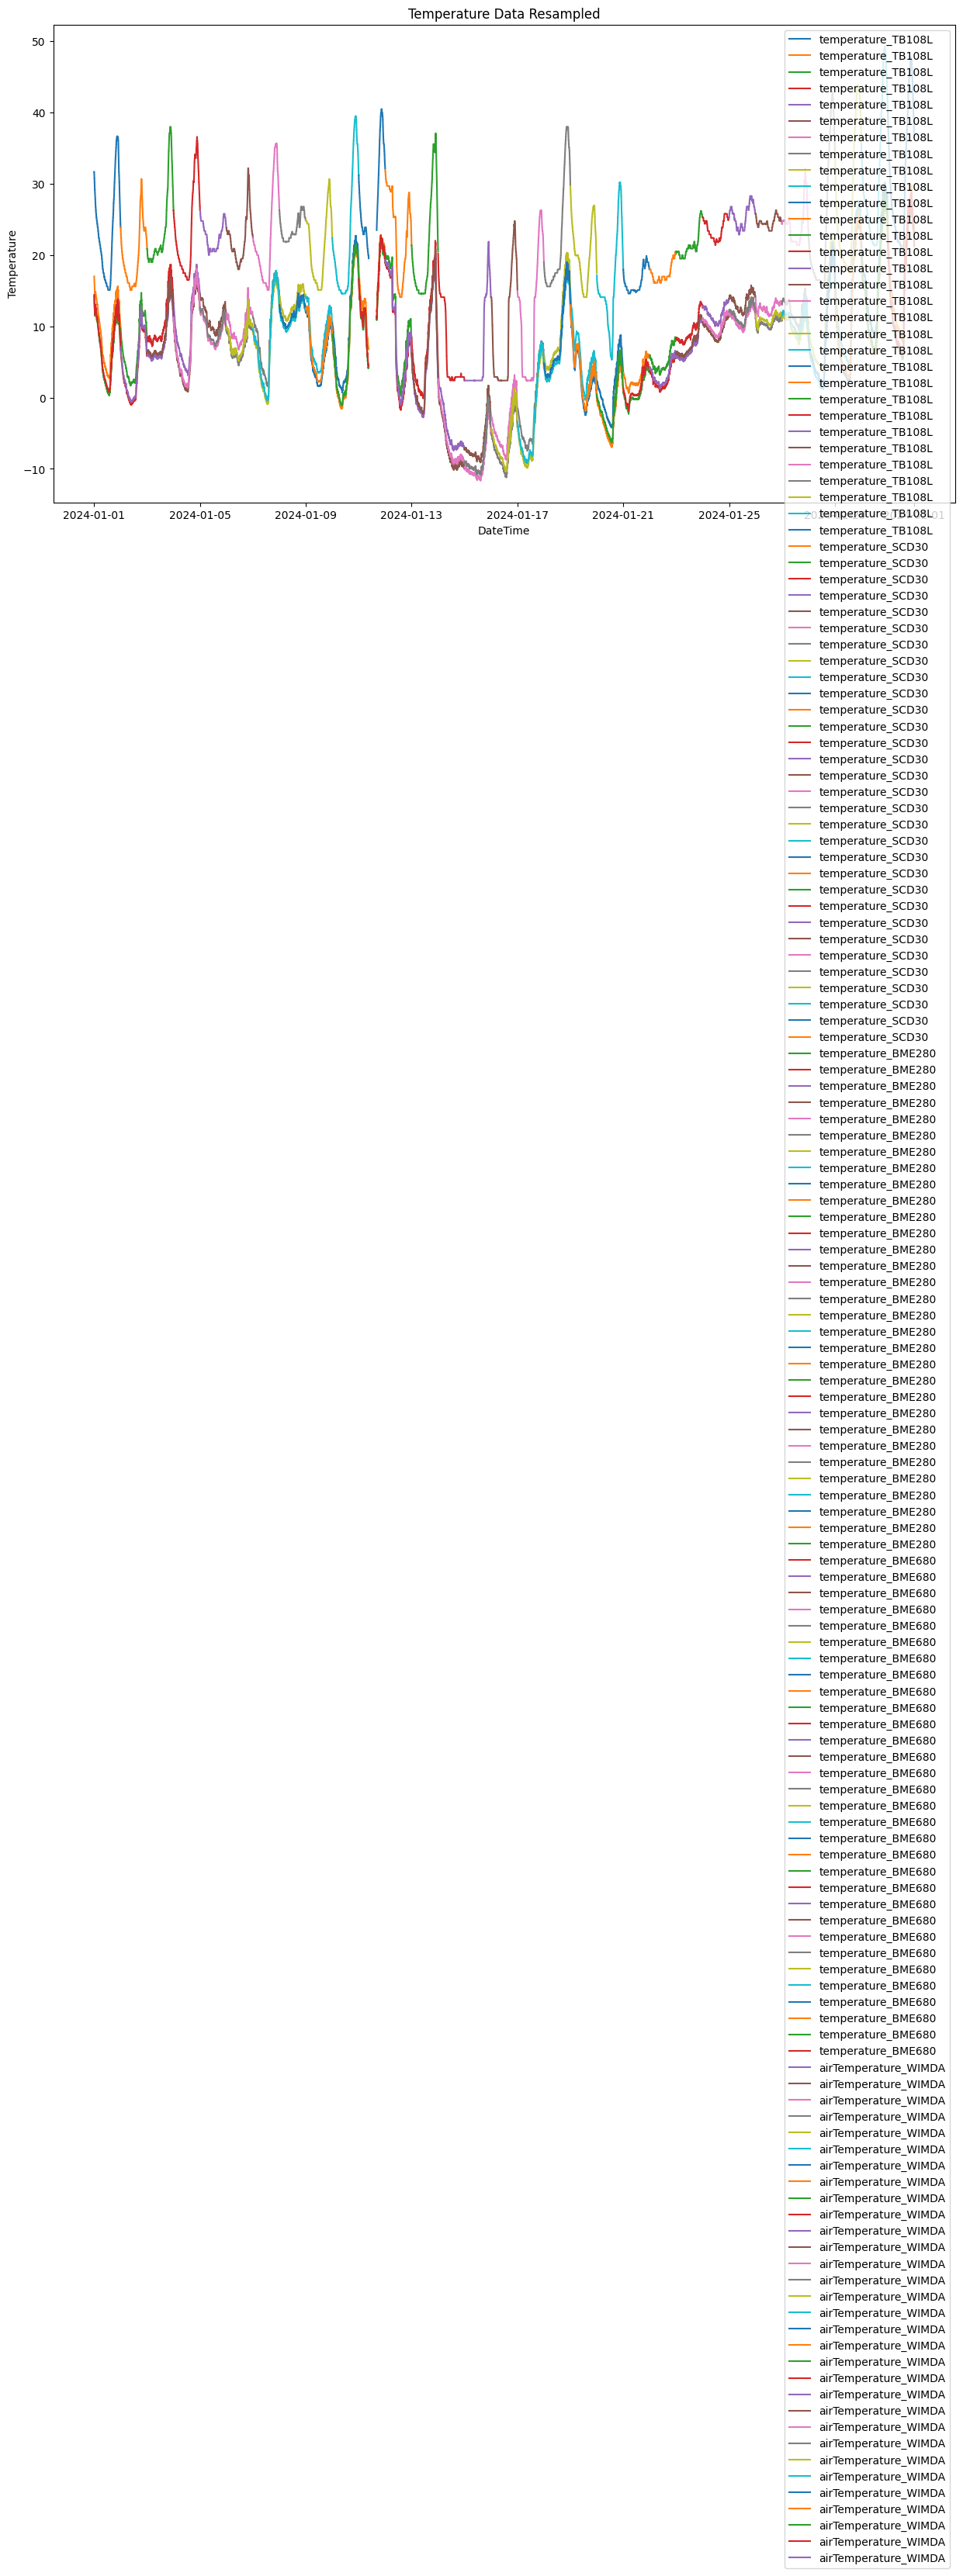

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import yaml
import os

def process_csv_files(yaml_file, base_folder):
    with open(yaml_file, 'r') as file:
        yaml_data = yaml.safe_load(file)

    node_ids = yaml_data['node_ids']
    sensor_ids = yaml_data['sensor_ids']

    temperature_dataframes = []

    for day in range(1, 32):  # Assuming the month has 31 days
        day_folder = os.path.join(base_folder, f"{day:02d}")
        if not os.path.exists(day_folder):
            continue
        
        for node_id in node_ids:
            for sensor_id in sensor_ids:
                file_pattern = f"MINTS_{node_id}_{sensor_id}_2024_01_{day:02d}.csv"
                file_path = os.path.join(day_folder, file_pattern)
                
                if not os.path.exists(file_path):
                    continue

                df = pd.read_csv(file_path)
                df['dateTime'] = pd.to_datetime(df['dateTime'], errors='coerce')
                df.set_index('dateTime', inplace=True)
                numerical_cols = df.select_dtypes(include=['number']).columns
                df_numerical = df[numerical_cols].rename(columns=lambda x: f"{x}_{sensor_id}")
                df_numerical.dropna(inplace=True)
                df_resampled = df_numerical.resample('1T').mean()  # Downsample to 1 minute intervals

                # Filter temperature columns
                temp_cols = [col for col in df_resampled.columns if 'temperature' in col.lower()]
                if temp_cols:
                    df_temperature = df_resampled[temp_cols]
                    temperature_dataframes.append(df_temperature)

    if not temperature_dataframes:
        return pd.DataFrame()

    temperature_dataframe = pd.concat(temperature_dataframes, axis=1)
    return temperature_dataframe

# Usage
yaml_file = '/Users/matthewlary/Desktop/Programming/Repos/sensor_calibration/SensorDataV2.yaml'
base_folder = '/Users/matthewlary/Downloads/01'

# Process the CSV files and get the temperature dataframe
temperature_dataframe = process_csv_files(yaml_file, base_folder)

# Display the first 20 rows of the temperature dataframe
pd.set_option('display.max_columns', None)  # Display all columns
print("First 20 rows of the temperature dataframe:")
print(temperature_dataframe.head(20))

# Plotting
if not temperature_dataframe.empty:
    plt.figure(figsize=(15, 8))
    # Plot only the first 5 temperature columns for a quick check
    for column in temperature_dataframe.columns[:5]:
        plt.plot(temperature_dataframe.index, temperature_dataframe[column], label=column)
    plt.xlabel('DateTime')
    plt.ylabel('Temperature')
    plt.title('Temperature Data Resampled')
    plt.legend()
    plt.show()
else:
    print("Temperature data is empty or required temperature columns are missing.")


/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_70303/1924518325.py:34: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_resampled = df_numerical.resample('1T').mean()  # Downsample to 1 minute intervals
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_70303/1924518325.py:34: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_resampled = df_numerical.resample('1T').mean()  # Downsample to 1 minute intervals
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_70303/1924518325.py:34: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_resampled = df_numerical.resample('1T').mean()  # Downsample to 1 minute intervals
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_70303/1924518325.py:34: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df

First 20 rows of the combined dataframe:
                     pm2_5_IPS7100  temperature_TB108L  temperature_SCD30  \
dateTime                                                                    
2024-01-01 00:00:00       3.361097              31.700          17.018333   
2024-01-01 00:01:00       3.019174              31.700          16.968333   
2024-01-01 00:02:00       3.117999              31.560          16.896667   
2024-01-01 00:03:00       2.762290              31.225          16.818000   
2024-01-01 00:04:00       2.418752              31.200          16.721667   
2024-01-01 00:05:00       3.637957              31.200          16.635000   
2024-01-01 00:06:00       4.228091              31.200          16.543333   
2024-01-01 00:07:00       4.378325              31.200          16.446667   
2024-01-01 00:08:00       2.904441              31.120          16.386667   
2024-01-01 00:09:00       2.781095              30.775          16.310000   
2024-01-01 00:10:00       3.425990 

/Users/matthewlary/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


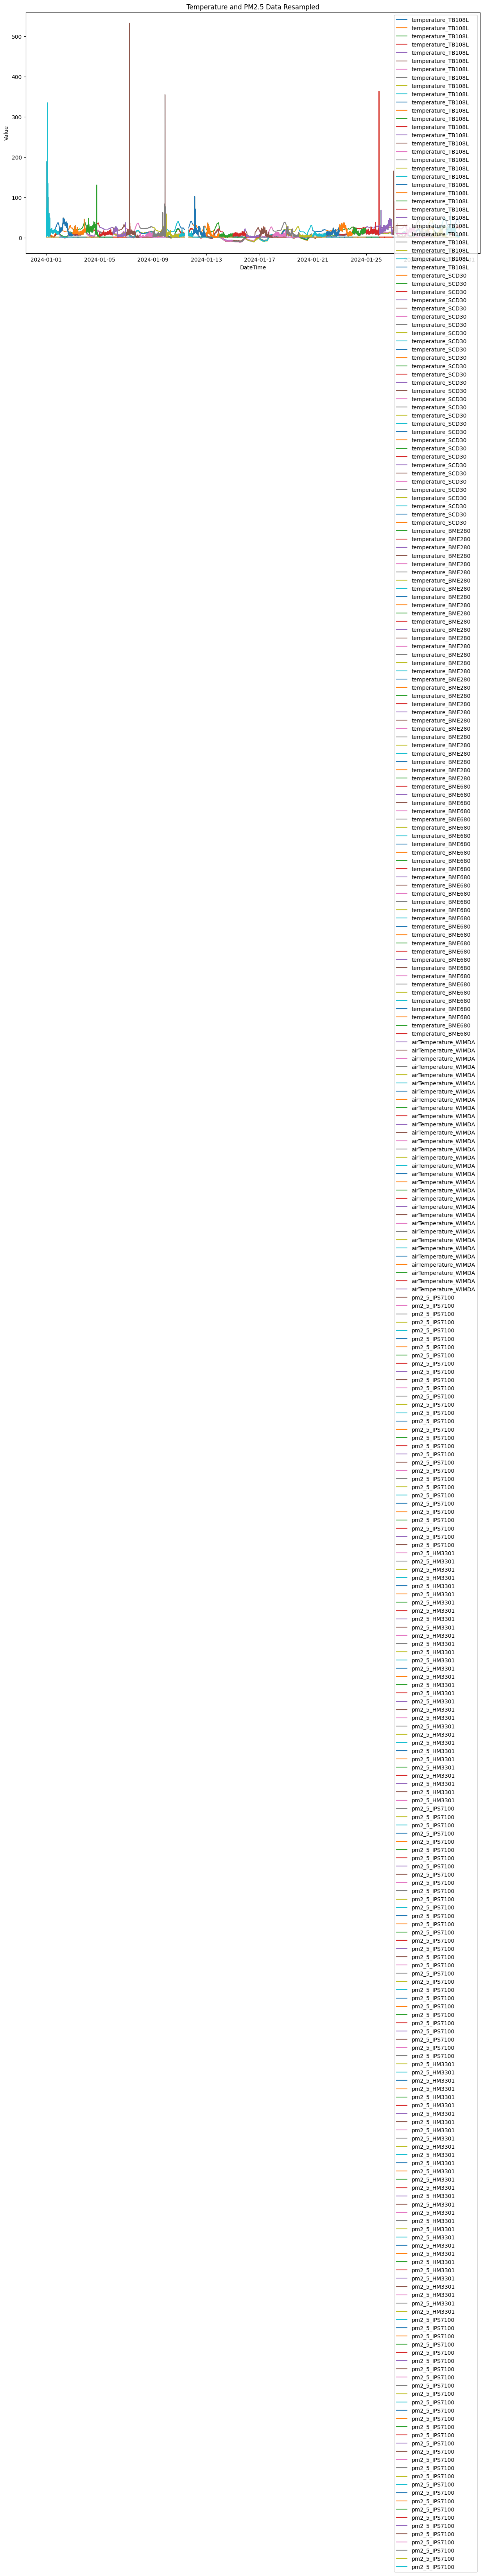

In [9]:
# For all 30 days the ips7100 should only have one dataframe after you run the code
# The resampling should only be done for the merged dataframe for the ips700 (this should be the same for all the sensors)
# After merging, each of the unique sensors dataframes should be merged together again into one wholistic dataframe (this is the dataframe that will be used for machine learning)

import pandas as pd
import matplotlib.pyplot as plt
import yaml
import os

def process_csv_files(yaml_file, base_folder):
    with open(yaml_file, 'r') as file:
        yaml_data = yaml.safe_load(file)

    node_ids = yaml_data['node_ids']
    sensor_ids = yaml_data['sensor_ids']

    combined_dataframes = []

    for day in range(1, 32):  # Assuming the month has 31 days
        day_folder = os.path.join(base_folder, f"{day:02d}")
        if not os.path.exists(day_folder):
            continue
        
        for node_id in node_ids:
            for sensor_id in sensor_ids:
                file_pattern = f"MINTS_{node_id}_{sensor_id}_2024_01_{day:02d}.csv"
                file_path = os.path.join(day_folder, file_pattern)
                
                if not os.path.exists(file_path):
                    continue

                df = pd.read_csv(file_path)
                df['dateTime'] = pd.to_datetime(df['dateTime'], errors='coerce')
                df.set_index('dateTime', inplace=True)
                numerical_cols = df.select_dtypes(include=['number']).columns
                df_numerical = df[numerical_cols].rename(columns=lambda x: f"{x}_{sensor_id}")
                df_numerical.dropna(inplace=True)
                df_resampled = df_numerical.resample('1T').mean()  # Downsample to 1 minute intervals

                # Filter temperature and pm2_5 columns
                relevant_cols = [col for col in df_resampled.columns if 'temperature' in col.lower() or 'pm2_5' in col.lower()]
                if relevant_cols:
                    df_relevant = df_resampled[relevant_cols]
                    combined_dataframes.append(df_relevant)

    if not combined_dataframes:
        return pd.DataFrame()

    combined_dataframe = pd.concat(combined_dataframes, axis=1)
    return combined_dataframe

# Usage
yaml_file = '/Users/matthewlary/Desktop/Programming/Repos/sensor_calibration/SensorDataV2.yaml'
base_folder = '/Users/matthewlary/Downloads/01'

# Process the CSV files and get the combined dataframe
combined_dataframe = process_csv_files(yaml_file, base_folder)

# Display the first 20 rows of the combined dataframe
pd.set_option('display.max_columns', None)  # Display all columns
print("First 20 rows of the combined dataframe:")
print(combined_dataframe.head(20))

# Plotting
if not combined_dataframe.empty:
    plt.figure(figsize=(15, 8))
    # Plot only the first 5 temperature columns and the first 5 pm2_5 columns for a quick check
    columns_to_plot = [col for col in combined_dataframe.columns if 'temperature' in col.lower()][:5]
    columns_to_plot += [col for col in combined_dataframe.columns if 'pm2_5' in col.lower()][:5]
    
    for column in columns_to_plot:
        plt.plot(combined_dataframe.index, combined_dataframe[column], label=column)
    plt.xlabel('DateTime')
    plt.ylabel('Value')
    plt.title('Temperature and PM2.5 Data Resampled')
    plt.legend()
    plt.show()
else:
    print("Data is empty or required columns are missing.")


In [ ]:
# Fix graphs so that there is one graph per sensor node
# Train ML model on one sensor node entire dataset(inputs are temperature, pressure, humidity. outputs are pm 2_5)
# Fix depreciation warnings 